## Pin one of the weights to see if the system is biased to that weight.

In [3]:
import sys
import os
sys.path.append('Jerome_scripts_Original/PGM/')
sys.path.append('selfPackages/')
sys.path.append('Jerome_scripts_Original/')

import numpy as np
import scipy as sc
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

try:
    import rbmPining
    import bm
except:
    print 'Compiling cy_utilities first'
    curr_dir = os.getcwd()
    os.chdir('PGM/')
    !python setup.py build_ext --inplace
    print 'Compilation done'
    os.chdir(curr_dir)
    
import pickle
from ising import IsingModel
import estimate_correlations_ising
from sklearn.utils import shuffle
import inlineMovies

In [ ]:
import dill
dill.dump_session('./data_bruckner/data/notebookData/7_pinningWeights.db')

In [13]:
#%%capture capt1
#Supress the output of the cell and save it to capt1

pinPos = [[0],[40]]

N = 100
beta = 1.
Num_configs = 10000

#Generate spins using Gibbs Sampling MCMC
BM = bm.BM(N=N,nature='Spin')

#Define Couplings
BM.layer.couplings =  beta* (np.eye(N=N,k=1) + np.eye(N=N,k=-1) )
BM.layer.couplings[0,-1] += beta
BM.layer.couplings[-1,0] += beta

data = BM.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs,Nstep=200) # N steps.

#Train the model
RBM = rbmPining.RBM(visible = 'Spin', n_v=N, n_h = 1, hidden = 'Spin',zero_field = True)
RBM.weights = 0.01*np.random.normal(loc=0,scale=0.1,size=(1,N))
RBM.weights[pinPos] = 2
results = RBM.fit(data,n_iter=100,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False,init='previous',PiningPos = pinPos)

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
Starting epoch 56
S

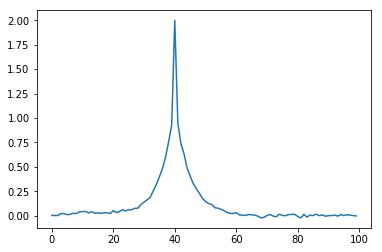

In [30]:
plt.plot(np.array(results['W'])[-1,0])

In [43]:
inlineMovies.generatePlot(Ydata=np.array(results['W']),Xdata=None,xlim=None,ylim=None,frames=None,interval=20)

NameError: name 'results' is not defined

## Move the pin after convergance to check if the weight moves

In [177]:
pinPos_new = [[0],[70]]
RBM2 = rbmPining.RBM(visible = 'Spin', n_v=N, n_h = 1, hidden = 'Spin',zero_field = True)
#RBM.weights = 0.01*np.random.normal(loc=0,scale=0.1,size=(1,N))
RBM2.weights = np.copy(np.array(results['W'])[-1])
RBM2.weights[pinPos_new] = 2
results2 = RBM2.fit(data,n_iter=100,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False,init='previous',PiningPos = pinPos_new)

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
Starting epoch 56
S

In [28]:
plt.plot(np.array(results2['W'])[0,0])

NameError: name 'results2' is not defined

## Multiple Pinnings

In [ ]:
pinPos3 = [[0,0],[70,30]]
RBM3 = rbmPining.RBM(visible = 'Spin', n_v=N, n_h = 1, hidden = 'Spin',zero_field = True)
#RBM.weights = 0.01*np.random.normal(loc=0,scale=0.1,size=(1,N))
RBM3.weights = 0.01*np.random.normal(loc=0,scale=0.1,size=(1,N))
RBM3.weights[pinPos3] = 0.5
results3 = RBM3.fit(data,n_iter=500,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False,init='previous',PiningPos = pinPos3)

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
Starting epoch 56
S

Starting epoch 438
Starting epoch 439
Starting epoch 440
Starting epoch 441
Starting epoch 442
Starting epoch 443
Starting epoch 444
Starting epoch 445
Starting epoch 446
Starting epoch 447
Starting epoch 448
Starting epoch 449
Starting epoch 450
Starting epoch 451
Starting epoch 452
Starting epoch 453
Starting epoch 454
Starting epoch 455
Starting epoch 456
Starting epoch 457
Starting epoch 458
Starting epoch 459
Starting epoch 460
Starting epoch 461
Starting epoch 462
Starting epoch 463
Starting epoch 464
Starting epoch 465
Starting epoch 466
Starting epoch 467


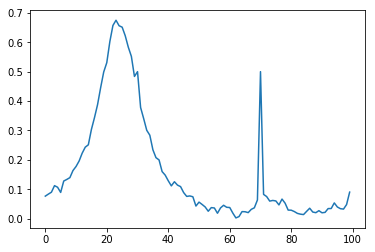

In [181]:
plt.plot(np.array(results3['W'])[-1,0])

In [8]:
import dill
dill.dump_session('./data/notebookData/7_pinningWeights.db')

In [4]:
import dill
dill.load_session('./data/notebookData/7_pinningWeights.db')

In [26]:
print RBM.likelihood(data).mean()
print RBM3.likelihood(data).mean()

-67.5708692273


NameError: name 'RBM3' is not defined

In [21]:
np.shape(np.array(results['W']))

(1000, 1, 100)